<a href="https://colab.research.google.com/github/SagarGuttal/ML-projects/blob/main/country_sucide_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('who_suicide_statistics.csv')
data.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


In [3]:
data = data.sort_values(['year'], ascending = True)

In [4]:
data.head()

,country,year,sex,age,suicides_no,population
6204,Brazil,1979,female,15-24 years,385.0,12448100.0
26470,Netherlands,1979,male,55-74 years,217.0,1040500.0
26471,Netherlands,1979,male,75+ years,93.0,235800.0
2615,Austria,1979,male,75+ years,NaN,141900.0
2614,Austria,1979,male,55-74 years,NaN,573800.0


In [5]:
data.shape

(43776, 6)

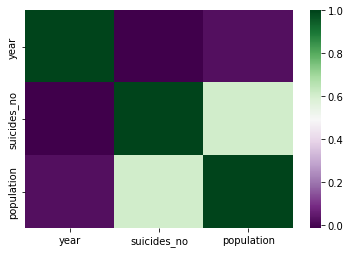

In [6]:
co_relation = data.corr()
sns.heatmap(co_relation,annot=False, cmap="PRGn")
plt.show()

In [7]:
data.rename({'sex' : 'gender', 'suicides_no' : 'suicides'}, inplace = True, axis = 1)

data.columns

Index(['country', 'year', 'gender', 'age', 'suicides', 'population'], dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43776 entries, 6204 to 25858
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     43776 non-null  object 
 1   year        43776 non-null  int64  
 2   gender      43776 non-null  object 
 3   age         43776 non-null  object 
 4   suicides    41520 non-null  float64
 5   population  38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.3+ MB


In [9]:
data.describe()

,year,suicides,population
count,43776.000000,41520.000000,3.831600e+04
mean,1998.502467,193.315390,1.664091e+06
std,10.338711,800.589926,3.647231e+06
min,1979.000000,0.000000,2.590000e+02
25%,1990.000000,1.000000,8.511275e+04
50%,1999.000000,14.000000,3.806550e+05
75%,2007.000000,91.000000,1.305698e+06
max,2016.000000,22338.000000,4.380521e+07


In [10]:
data.isnull().sum()

country          0
year             0
gender           0
age              0
suicides      2256
population    5460
dtype: int64

In [11]:
data.isnull().sum()/len(data)

country       0.000000
year          0.000000
gender        0.000000
age           0.000000
suicides      0.051535
population    0.124726
dtype: float64

In [12]:
data['country'].value_counts()

Hungary                     456
Mauritius                   456
Austria                     456
Netherlands                 456
United States of America    456
                           ... 
Mongolia                     24
Iraq                         12
Macau                        12
Cabo Verde                   12
Zimbabwe                     12
Name: country, Length: 141, dtype: int64

# visualising the different countries distribution in the dataset

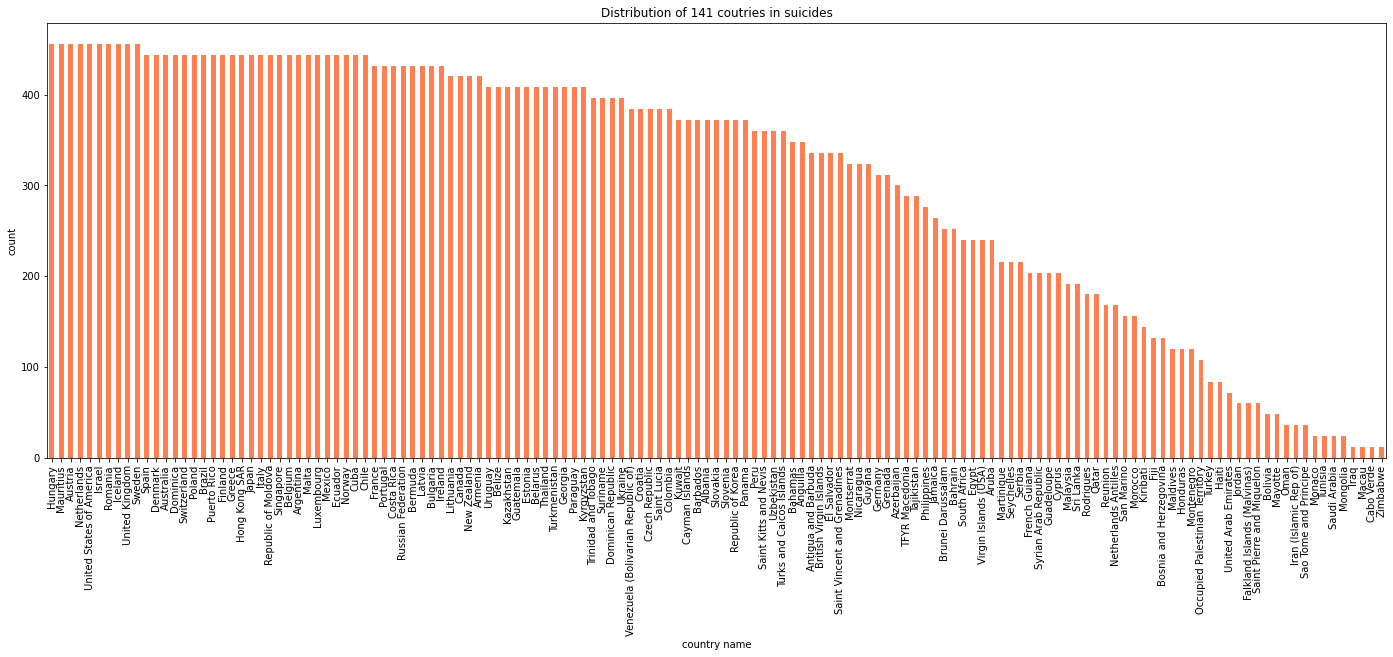

In [13]:
data['country'].value_counts(normalize = True)
data['country'].value_counts(dropna = False).plot.bar(color = 'coral', figsize = (24, 8))

plt.title('Distribution of 141 coutries in suicides')
plt.xlabel('country name')
plt.ylabel('count')
plt.show()

# visualising the different year distribution in the dataset

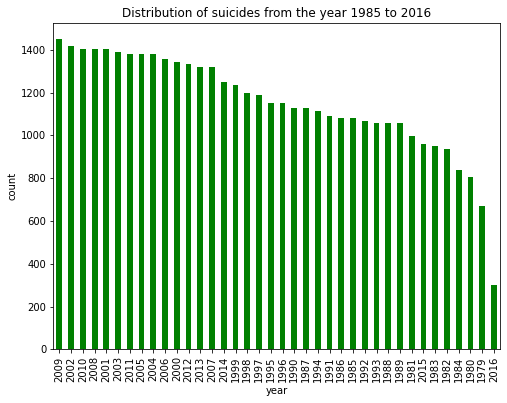

In [14]:
data['year'].value_counts(normalize = True)
data['year'].value_counts(dropna = False,).plot.bar(color = 'green', figsize = (8, 6))

plt.title('Distribution of suicides from the year 1985 to 2016')
plt.xlabel('year')
plt.ylabel('count')
plt.show()

## **Preprocessing**

In [15]:
for column in data.columns:
  print("-"*30,column,"-"*30)
  print(data[column].unique())

------------------------------ country ------------------------------
['Brazil' 'Netherlands' 'Austria' 'New Zealand' 'Trinidad and Tobago'
 'Canada' 'Norway' 'Panama' 'Paraguay' 'Belize' 'Thailand' 'Bulgaria'
 'Bahamas' 'Luxembourg' 'United Kingdom' 'Kuwait' 'Mauritius' 'Mexico'
 'Ecuador' 'Malta' 'Cuba' 'Chile' 'Saint Lucia' 'Suriname' 'Argentina'
 'Romania' 'Singapore' 'Spain' 'Costa Rica' 'Denmark' 'Australia'
 'Dominica' 'Switzerland' 'Poland' 'Sweden' 'Puerto Rico' 'Portugal'
 'Iceland' 'Belgium' 'Uruguay' 'Hungary' 'Finland' 'Ireland' 'Israel'
 'United States of America' 'Barbados' 'France' 'Guatemala' 'Greece'
 'French Guiana' 'Guyana' 'Hong Kong SAR'
 'Venezuela (Bolivarian Republic of)' 'Japan' 'Italy'
 'Falkland Islands (Malvinas)' 'Republic of Moldova' 'Jamaica' 'Egypt'
 'Haiti' 'Latvia' 'Bermuda' 'Russian Federation' 'Dominican Republic'
 'Philippines' 'Sri Lanka' 'Turks and Caicos Islands'
 'Virgin Islands (USA)' 'Syrian Arab Republic' 'Cayman Islands'
 'Uzbekistan' 'Lith

In [16]:
# label encoding for gender

from sklearn.preprocessing import LabelEncoder

# creating an encoder
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])

data['gender'].value_counts()

0    21888
1    21888
Name: gender, dtype: int64

In [17]:
# replacing categorical values in the age column

data['age'] = data['age'].replace('5-14 years', 0)
data['age'] = data['age'].replace('15-24 years', 1)
data['age'] = data['age'].replace('25-34 years', 2)
data['age'] = data['age'].replace('35-54 years', 3)
data['age'] = data['age'].replace('55-74 years', 4)
data['age'] = data['age'].replace('75+ years', 5)

data['age'].value_counts()

1    7296
4    7296
5    7296
0    7296
3    7296
2    7296
Name: age, dtype: int64

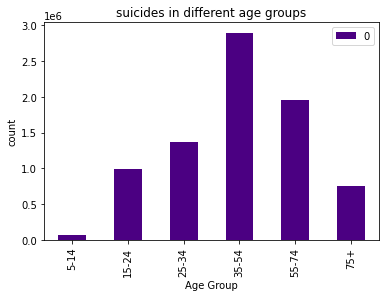

In [18]:
# suicides in different age groups

x1 = data[data['age'] == 0]['suicides'].sum()
x2 = data[data['age'] == 1]['suicides'].sum()
x3 = data[data['age'] == 2]['suicides'].sum()
x4 = data[data['age'] == 3]['suicides'].sum()
x5 = data[data['age'] == 4]['suicides'].sum()
x6 = data[data['age'] == 5]['suicides'].sum()

x = pd.DataFrame([x1, x2, x3, x4, x5, x6])
x.index = ['5-14', '15-24', '25-34', '35-54', '55-74', '75+']
x.plot(kind = 'bar', color = 'indigo')

plt.title('suicides in different age groups')
plt.xlabel('Age Group')
plt.ylabel('count')
plt.show()

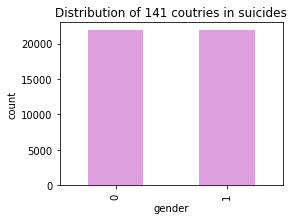

In [19]:
# visualising the gender distribution in the dataset

data['gender'].value_counts(normalize = True)
data['gender'].value_counts(dropna = False).plot.bar(color = 'plum', figsize = (4, 3))

plt.title('Distribution of 141 coutries in suicides')
plt.xlabel('gender')
plt.ylabel('count')
plt.show()

In [20]:
# total population of 141 countres over which the suicides survey is committed

data['population'].sum()

63761315943.0

In [21]:

# Average population

Avg_pop = data['population'].mean()
print(Avg_pop)

1664091.1353742562


In [22]:
# total number of suicides committed in the 141 countries from 1985 to 2016

data['suicides'].sum()

8026455.0

In [23]:
# Average suicide in the world
Avg_sui = data['suicides'].mean()
print(Avg_sui)

193.3153901734104


In [24]:
# Imputing the NaN values from the population column

data['population'] = data['population'].fillna(data['population'].median())
data['population'].isnull().any()


False

In [25]:
# Imputing the values suicides no column

data['suicides'] = data['suicides'].fillna(0)
data['suicides'].isnull().any()

False

In [26]:
# rearranging the columns 
data = data[['country', 'year', 'gender', 'age', 'population', 'suicides']]
data.head(0)

,country,year,gender,age,population,suicides


In [27]:
# Removing the country Column

data = data.drop(['country'], axis = 1)
data.head(0)

,year,gender,age,population,suicides


In [28]:
#splitting the data into dependent and independent variables

x = data.iloc[:,:-1]
y = data.iloc[:,-1]

print(x.shape)
print(y.shape)

(43776, 4)
(43776,)


In [29]:
# splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(32832, 4)
(32832,)
(10944, 4)
(10944,)


## Scalling

In [30]:
# importing the min max scaler
from sklearn.preprocessing import MinMaxScaler

In [31]:
ms = MinMaxScaler()
# scaling the independent variables
x_train_scaled = ms.fit_transform(x_train)
x_test_scaled = ms.transform(x_test)

## **principal component analysis**

In [32]:
# using principal component analysis

from sklearn.decomposition import PCA

# creating a principal component analysis model
pca = PCA(n_components = None)

# feeding the independent variables to the PCA model
PCA_x_train = pca.fit_transform(x_train)
PCA_x_test = pca.transform(x_test)

# visualising the principal components that will explain the highest share of variance
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

# creating a principal component analysis model
pca = PCA(n_components = 1)

# feeding the independent variables to the PCA model
PCA_x_train = pca.fit_transform(x_train)
PCA_x_test = pca.transform(x_test)

[1.00000000e+00 8.98302402e-12 2.42654563e-13 2.09854245e-14]


In [33]:
print(PCA_x_train)

[[-1131522.73498397]
 [  898897.26501635]
 [ -795941.73498394]
 ...
 [ 1304022.26501542]
 [-1412977.7349851 ]
 [-1174877.73498495]]


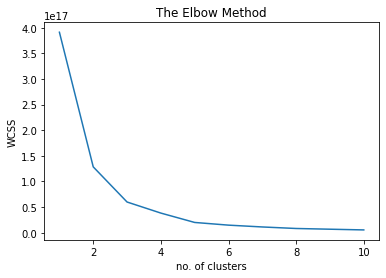

In [34]:
#selecting the best choice for no. of clusters
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  km.fit(x_train)
  wcss.append(km.inertia_)
  
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no. of clusters')
plt.ylabel('WCSS')
plt.show()

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [36]:
linear_model = LinearRegression()
linear_model.fit(x_train_scaled,y_train)
linear_prediction = linear_model.predict(x_test_scaled)
r2_score = r2_score(y_test,linear_prediction)
mean_squared_error = mean_squared_error(y_test,linear_prediction)
print("MSE :-",mean_squared_error)
print("R2_score :-",r2_score)
print("RMSE :-",np.sqrt(mean_squared_error))

MSE :- 356895.2657487033
R2_score :- 0.3911230760802389
RMSE :- 597.4071189303851
